The first thing I want to do with this set is assess the number of rows which contain an entry for age and sex and then remove any rows which do not contain this information. I also need to filter the images to contain only files with a PA view. 

In [5]:
import pandas as pd
from tqdm import tqdm

input_file = r'F:\FYP Datasets\BRAX\master_spreadsheet_update.csv'
df = pd.read_csv(input_file)

tqdm.pandas()

filtered_df = df[(df['PatientSex'].notnull()) & (df['PatientAge'].notnull()) & (df['ViewPosition'] == 'PA')]
output_file = r'F:\FYP Datasets\BRAX\output_spreadsheet1.csv'
filtered_df.to_csv(output_file, index=False)

print(f"Number of rows copied: {len(filtered_df)}")

Number of rows copied: 13960


Next I want to get a breakdown of the remaining data in some readable charts

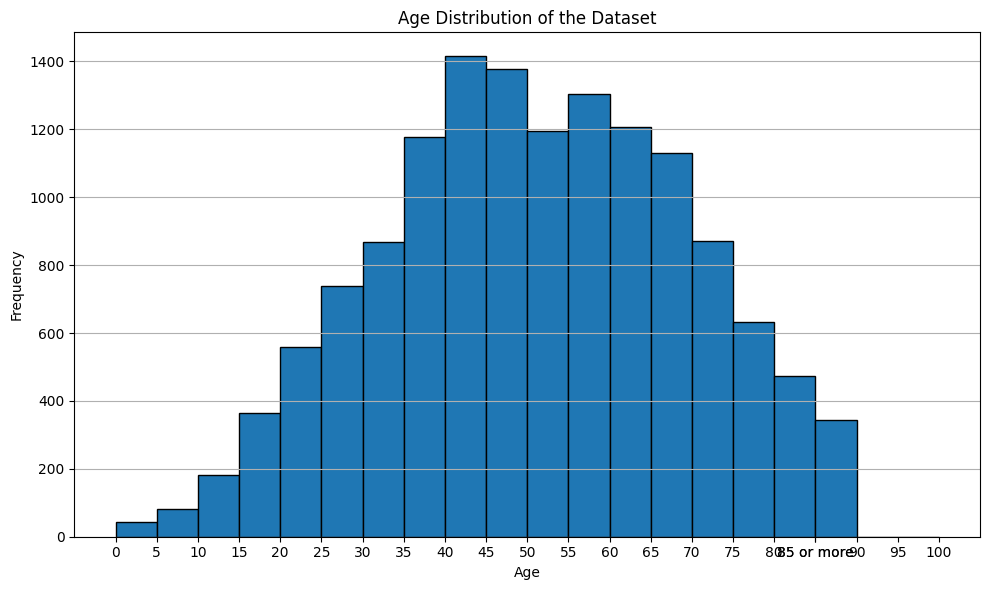

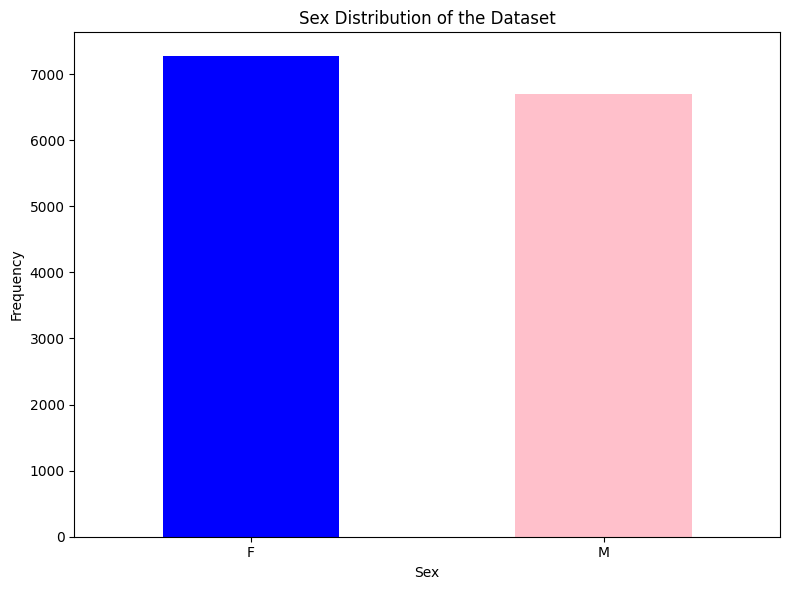

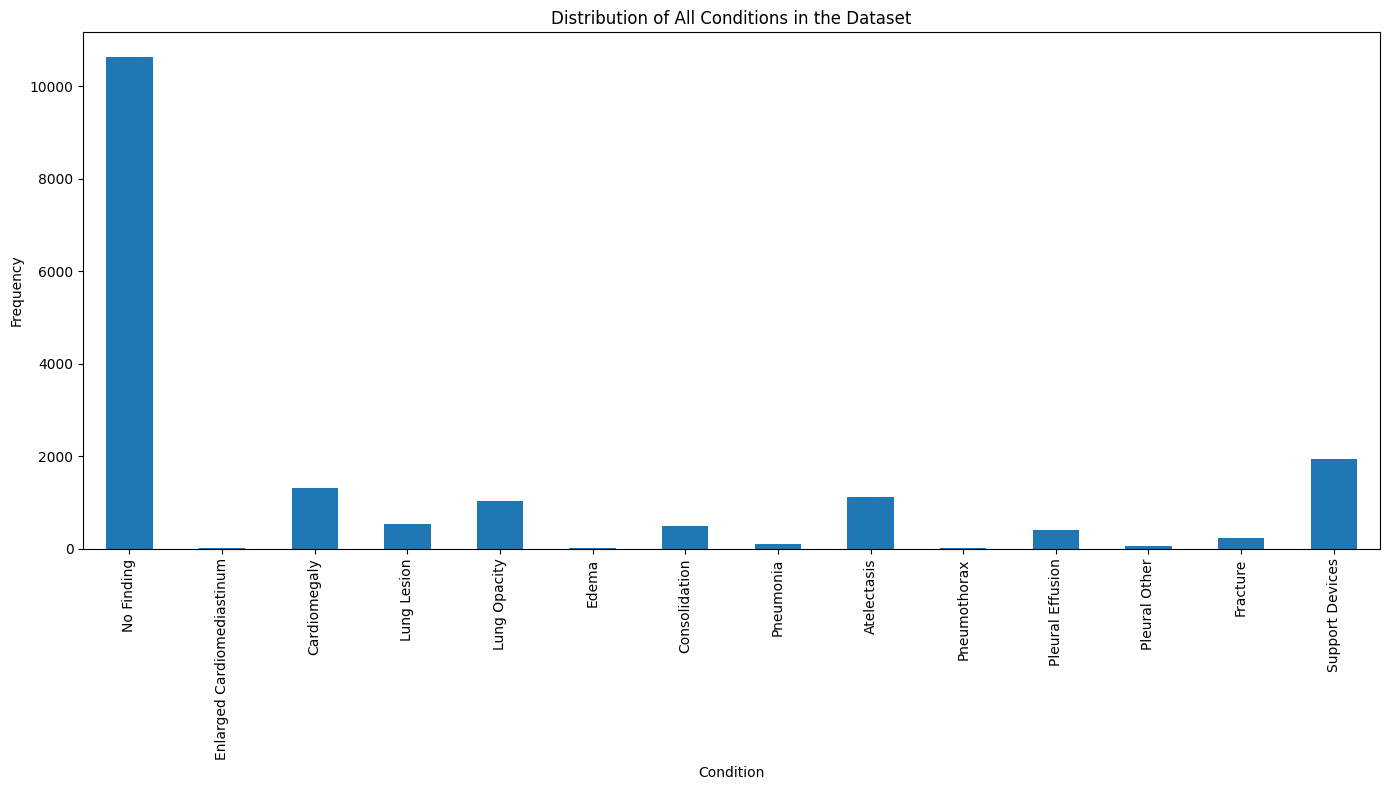

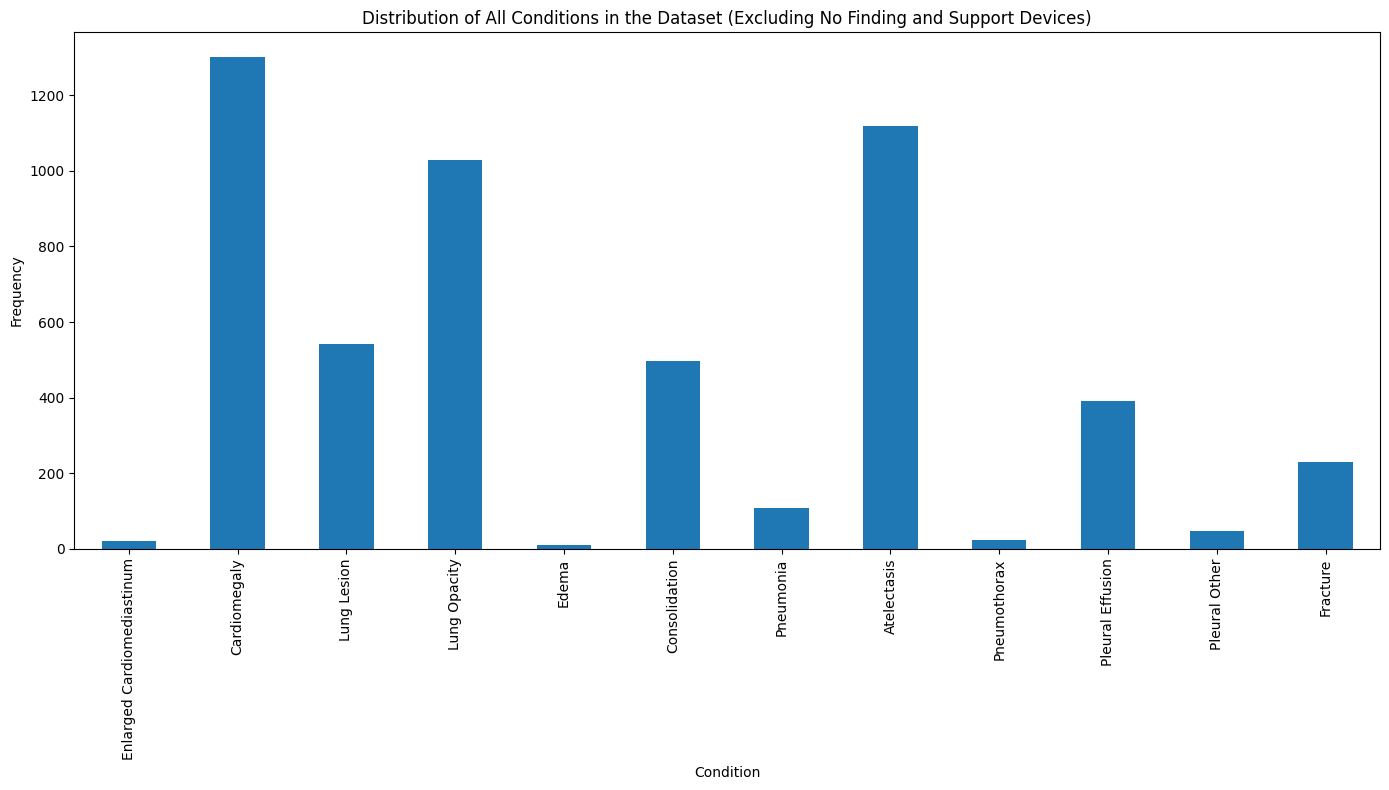

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

filtered_file = r'F:\FYP Datasets\BRAX\output_spreadsheet1.csv'
df = pd.read_csv(filtered_file)

#Need this beacause of the way dataset records age
df['PatientAge'] = df['PatientAge'].replace('85 or more', 85)
df['PatientAge'] = pd.to_numeric(df['PatientAge'], errors='coerce')

plt.figure(figsize=(10, 6))
plt.hist(df['PatientAge'].dropna(), bins=range(0, 101, 5), edgecolor='black')
plt.title('Age Distribution of the Dataset')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.xticks(list(range(0, 101, 5)) + [85], labels=list(range(0, 101, 5)) + ['85 or more'])
plt.grid(axis='y')
plt.tight_layout()
plt.show()

df['PatientAge'] = df['PatientAge'].replace(85, '85 or more')

sex_counts = df['PatientSex'].value_counts()

plt.figure(figsize=(8, 6))
sex_counts.plot(kind='bar', color=['blue', 'pink', 'gray'])
plt.title('Sex Distribution of the Dataset')
plt.xlabel('Sex')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

conditions = [
    'No Finding', 'Enlarged Cardiomediastinum', 'Cardiomegaly', 'Lung Lesion',
    'Lung Opacity', 'Edema', 'Consolidation', 'Pneumonia', 'Atelectasis',
    'Pneumothorax', 'Pleural Effusion', 'Pleural Other', 'Fracture', 'Support Devices'
]

condition_counts = df[conditions].apply(lambda x: (x == 1).sum())

plt.figure(figsize=(14, 8))
condition_counts.plot(kind='bar')
plt.title('Distribution of All Conditions in the Dataset')
plt.xlabel('Condition')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


conditions = [
    'Enlarged Cardiomediastinum', 'Cardiomegaly', 'Lung Lesion',
    'Lung Opacity', 'Edema', 'Consolidation', 'Pneumonia', 'Atelectasis',
    'Pneumothorax', 'Pleural Effusion', 'Pleural Other', 'Fracture'
]

condition_counts = df[conditions].apply(lambda x: (x == 1).sum())

plt.figure(figsize=(14, 8))
condition_counts.plot(kind='bar')
plt.title('Distribution of All Conditions in the Dataset (Excluding No Finding and Support Devices)')
plt.xlabel('Condition')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()